#### Analysing the reason why death rate plummed tremendously after 1995 in California.

In [212]:
import pandas as pd
import calendar as cal
import seaborn as sns
import matplotlib.pyplot as plt

import os, operator
import json
from nltk.tag import pos_tag # for tree and chunks

import nltk
import requests, configparser, os, sys, json, glob
from nltk.tag import pos_tag
from nltk import Tree
from nltk import ne_chunk
from nltk.corpus import stopwords
from datetime import datetime

import numpy as np

In [213]:
state = 'California'
parent_dir_95_20 = '../data/nytimes_data/California_95_20s'
parent_dir_88_93 = '../data/nytimes_data/California_88_93'
homicide_file = '..\data\\raw_data\Analysis_1\homicide-reports\homicide_db.csv'
output_folder = "..\data\\processed\Analysis_4\\"
years_for_analysis_95 = [1995,1996,1997,1998,1999,2000]
years_for_analysis_88 = [1988,1989,1990,1991,1992,1993]
subject_dirs_95_20 = [os.path.join(parent_dir_95_20, dir) for dir in os.listdir(parent_dir_95_20) if os.path.isdir(os.path.join(parent_dir_95_20, dir))]
subject_dirs_88_93 = [os.path.join(parent_dir_88_93, dir) for dir in os.listdir(parent_dir_88_93) if os.path.isdir(os.path.join(parent_dir_88_93, dir))]

In [214]:
#reading homicide csv file
df_homicide = pd.read_csv(homicide_file)
df_homicide['count'] = 1
df_homicide.columns

C:\Users\Rainbow\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source', 'count'],
      dtype='object')

In [215]:
#homicide data during 88
df_homicide_california_88 = df_homicide[df_homicide['State']==state]
df_homicide_california_88 = df_homicide_california_88[df_homicide_california_88['Year'].isin(years_for_analysis_88)]

In [216]:
#homicide data during 95
df_homicide_california_95 = df_homicide[df_homicide['State']==state]
df_homicide_california_95 = df_homicide_california_95[df_homicide_california_95['Year'].isin(years_for_analysis_95)]

#### Identifying the perpetrators by age group.

In [217]:
#perpetrators during 88 

df_homicide_california_88_age = df_homicide_california_88.groupby('Perpetrator Age').sum()
df_homicide_california_88_age = df_homicide_california_88_age.reset_index()
df_homicide_california_88_age = df_homicide_california_88_age[['Perpetrator Age','Victim Count','count']]
df_homicide_california_88_age.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_88_age = df_homicide_california_88_age[df_homicide_california_88_age['Perpetrator Age'] != 0]
df_homicide_california_88_age = df_homicide_california_88_age#[:10]
df_homicide_california_88_age.sort(ascending=False,columns='Perpetrator Age',inplace=True)
df_homicide_california_88_age.rename(columns={'count': 'Total_Murder_1988_93'}, inplace=True)
df_homicide_california_88_age = df_homicide_california_88_age[['Perpetrator Age','Total_Murder_1988_93']]

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [218]:
#perpetrators during 95

df_homicide_california_95_age = df_homicide_california_95.groupby('Perpetrator Age').sum()
df_homicide_california_95_age = df_homicide_california_95_age.reset_index()
df_homicide_california_95_age = df_homicide_california_95_age[['Perpetrator Age','Victim Count','count']]
df_homicide_california_95_age.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_95_age = df_homicide_california_95_age[df_homicide_california_95_age['Perpetrator Age'] != 0]
df_homicide_california_95_age = df_homicide_california_95_age#[:10]
df_homicide_california_95_age.sort(ascending=False,columns='Perpetrator Age',inplace=True)
df_homicide_california_95_age.rename(columns={'count': 'Total_Murder_1995_00'}, inplace=True)
df_homicide_california_95_age = df_homicide_california_95_age[['Perpetrator Age','Total_Murder_1995_00']]

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [219]:
#merging to dataframes
df_homicide_california_merged_age = pd.merge(df_homicide_california_88_age,df_homicide_california_95_age, on=['Perpetrator Age'])
df_homicide_california_merged_age.sort(ascending=False,columns="Total_Murder_1988_93",inplace=True)
df_homicide_california_merged_age = df_homicide_california_merged_age[:10]
df_homicide_california_merged_age

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Perpetrator Age,Total_Murder_1988_93,Total_Murder_1995_00
72,18,828,569
71,19,823,573
70,20,817,704
65,25,703,402
69,21,686,455
68,22,669,418
73,17,650,432
67,23,578,397
66,24,555,353
60,30,544,283


In [220]:
df_homicide_california_merged_age.index = df_homicide_california_merged_age['Perpetrator Age']
df_homicide_california_merged_age = df_homicide_california_merged_age[['Total_Murder_1988_93','Total_Murder_1995_00']]

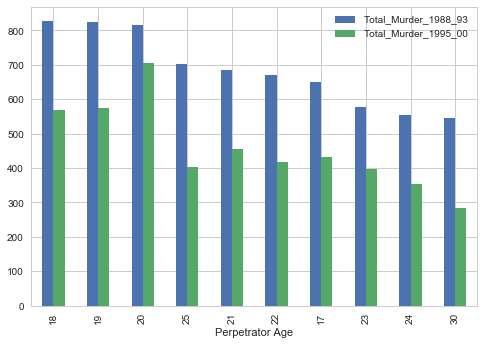

In [221]:
df_homicide_california_merged_age.plot.bar()
plt.show()

##### Note: The bar graph shows that there was a tremendous decrease in crime perpetuators at various age groups after 1995 

In [222]:
#writing output to csv file
df_homicide_california_merged_age.to_csv(output_folder+'Crime_comparison_1988_1995_by_age.csv', sep=',', encoding='utf-8')

#### Comparing the type and number of weapons used between 1988-93 and 1995-00

In [223]:
df_homicide_california_88_weapon = df_homicide_california_88.groupby('Weapon').sum()
df_homicide_california_88_weapon = df_homicide_california_88_weapon.reset_index()
df_homicide_california_88_weapon = df_homicide_california_88_weapon[['Weapon','Victim Count','count']]
#df_homicide_california_88_weapon

In [224]:
df_homicide_california_88_weapon.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_88_weapon = df_homicide_california_88_weapon[:7]
df_homicide_california_88_weapon_plot = df_homicide_california_88_weapon[['Weapon','count']]
df_homicide_california_88_weapon_plot.rename(columns={'count': 'Total_Weapon_1988_93'}, inplace=True)

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Rainbow\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [225]:
df_homicide_california_95_weapon = df_homicide_california_95.groupby('Weapon').sum()
df_homicide_california_95_weapon = df_homicide_california_95_weapon.reset_index()
df_homicide_california_95_weapon = df_homicide_california_95_weapon[['Weapon','Victim Count','count']]
#df_homicide_california_95_weapon

In [226]:
df_homicide_california_95_weapon.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_95_weapon = df_homicide_california_95_weapon[:7]
df_homicide_california_95_weapon_plot = df_homicide_california_95_weapon[['Weapon','count']]
df_homicide_california_95_weapon_plot.rename(columns={'count': 'Total_Weapon_1995_00'}, inplace=True)

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Rainbow\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [227]:
#merging to dataframes
df_homicide_california_merged_weapon = pd.merge(df_homicide_california_88_weapon_plot,df_homicide_california_95_weapon_plot, on=['Weapon'])
df_homicide_california_merged_weapon.sort(ascending=False,columns="Total_Weapon_1988_93",inplace=True)
df_homicide_california_merged_weapon = df_homicide_california_merged_weapon[:10]

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [228]:
df_homicide_california_merged_weapon.index = df_homicide_california_merged_weapon['Weapon']
df_homicide_california_merged_weapon = df_homicide_california_merged_weapon[['Total_Weapon_1988_93','Total_Weapon_1995_00']]
df_homicide_california_merged_weapon

,Total_Weapon_1988_93,Total_Weapon_1995_00
Weapon,,
Handgun,13291,10342
Knife,3357,1917
Blunt Object,2189,1590
Shotgun,1229,516
Rifle,1116,616
Strangulation,564,354


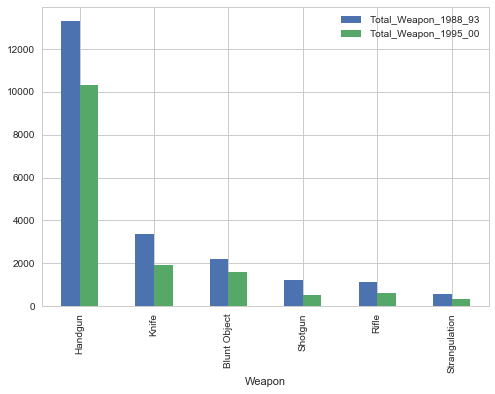

In [229]:
df_homicide_california_merged_weapon.plot.bar()
plt.show()

##### Note: The above graph shows that there were a signifcant decrease in the usage of certain weapons like Handgun, Shotgun, Rifle etc.. these have led to lower death rates. 

In [230]:
#writing output to csv file
df_homicide_california_merged_weapon.to_csv(output_folder+'Crime_comparison_1988_1995_by_weapon.csv', sep=',', encoding='utf-8')

#### Analysing the data sets to verify if new gun regulations where introduced or not, which inturn led to a drop in gun use in California.

In [231]:
file_count_dict_95_20 = {}
file_count_dict_88_93 = {}

In [232]:
# Analysing the 1995 to 2000 articles and the topics those were more in concern

for dir in subject_dirs_95_20:
    dir_name = dir.replace((parent_dir_95_20+'\\'),'')
    file_count_dict_95_20[dir_name] = 0
    csv_files = [os.path.join(dir, json) for json in os.listdir(dir) if os.path.isfile(os.path.join(dir, json)) and 
                 json.endswith('.json')]
    for file in csv_files:
        file_name = file.replace((dir+'\\'),'')
        url = (parent_dir_95_20+'\\')+dir_name+'/'+file_name
        with open(url) as data_file:    
            file_data = json.load(data_file)
            file_count_dict_95_20[dir_name] = file_count_dict_95_20[dir_name] + 1

In [233]:
#pd.DataFrame(word_count.items(),columns=['Word', 'Count'])
df_subject_dirs_95_20_sorted = pd.DataFrame.from_dict(file_count_dict_95_20,orient='index')
df_subject_dirs_95_20_sorted = df_subject_dirs_95_20_sorted.reset_index()
df_subject_dirs_95_20_sorted.columns = ['File', 'Count']
df_subject_dirs_95_20_sorted.sort(ascending=False,columns='Count',inplace=True)
df_subject_dirs_95_20_sorted = df_subject_dirs_95_20_sorted.reset_index()
df_subject_dirs_95_20_sorted.rename(columns={'Count': 'Total_articles_95_20'}, inplace=True)

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [234]:
# Analysing the 1988 to 1993 articles and the topics those were more in concern

for dir in subject_dirs_88_93:
    dir_name = dir.replace((parent_dir_88_93+'\\'),'')
    file_count_dict_88_93[dir_name] = 0
    csv_files = [os.path.join(dir, json) for json in os.listdir(dir) if os.path.isfile(os.path.join(dir, json)) and json.endswith('.json')]
    for file in csv_files:
        file_name = file.replace((dir+'\\'),'')
        url = (parent_dir_88_93+'\\')+dir_name+'/'+file_name
        with open(url) as data_file:    
            file_data = json.load(data_file)
            file_count_dict_88_93[dir_name] = file_count_dict_88_93[dir_name] + 1

In [235]:
#pd.DataFrame(word_count.items(),columns=['Word', 'Count'])
df_subject_dirs_88_93_sorted = pd.DataFrame.from_dict(file_count_dict_88_93,orient='index')
df_subject_dirs_88_93_sorted = df_subject_dirs_88_93_sorted.reset_index()
df_subject_dirs_88_93_sorted.columns = ['File', 'Count']
df_subject_dirs_88_93_sorted.sort(ascending=False,columns='Count',inplace=True)
df_subject_dirs_88_93_sorted = df_subject_dirs_88_93_sorted.reset_index()
df_subject_dirs_88_93_sorted.rename(columns={'Count': 'Total_articles_88_93'}, inplace=True)

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [236]:
#df_subject_dirs_sorted GRAPH

In [237]:
df_subject_dirs_sorted_list = df_subject_dirs_sorted['File'].tolist()
df_subject_dirs_sorted_list

['ELECTIONS',
 'REFERENDUMS',
 'EDUCATION AND SCHOOLS',
 'BIOGRAPHICAL INFORMATION',
 'LAW AND LEGISLATION',
 'AFFIRMATIVE ACTION',
 'FINANCES',
 'DECISIONS AND VERDICTS',
 'SUITS AND LITIGATION',
 'ELECTION ISSUES',
 'PRESIDENTIAL ELECTION OF 1996',
 'BLACKS',
 'MURDERS AND ATTEMPTED MURDERS',
 'ELECTRIC LIGHT AND POWER',
 'MEDICINE AND HEALTH',
 'WEATHER',
 'PRESIDENTIAL ELECTION OF 2000',
 'COLLEGES AND UNIVERSITIES',
 'MERGERS, ACQUISITIONS AND DIVESTITURES',
 'LABOR',
 'PRICES (FARES, FEES AND RATES)',
 'CHILDREN AND YOUTH',
 'REGULATION AND DEREGULATION OF INDUSTRY',
 'PRIMARIES',
 'GOVERNORS (US)',
 'EDITORIALS',
 'IMMIGRATION AND REFUGEES',
 'HISPANIC-AMERICANS',
 'MINORITIES (ETHNIC, RACIAL, RELIGIOUS)',
 'BILINGUAL EDUCATION',
 'ALCOHOLIC BEVERAGES',
 'SMOKING AND TOBACCO',
 'AUTOMOBILES',
 'WINES',
 'DISCRIMINATION',
 'FLOODS',
 'WOMEN',
 'TAXATION',
 'AIR POLLUTION',
 'ACCIDENTS AND SAFETY',
 'DRUG ABUSE AND TRAFFIC',
 'PUBLIC OPINION',
 'OIL (PETROLEUM) AND GASOLINE',
 'CO

In [238]:
#merging to dataframes
df_subject_dirs_merged = pd.merge(df_subject_dirs_88_93_sorted,df_subject_dirs_95_20_sorted, on=['File'])
df_subject_dirs_merged.sort(ascending=False,columns="Total_articles_88_93",inplace=True)
df_subject_dirs_merged = df_subject_dirs_merged[:10]

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [239]:
df_subject_dirs_merged = df_subject_dirs_merged[['File','Total_articles_88_93','Total_articles_95_20']]

In [240]:
df_subject_dirs_merged.index = df_subject_dirs_merged['File']
df_subject_dirs_merged = df_subject_dirs_merged[['Total_articles_88_93','Total_articles_95_20']]
df_subject_dirs_merged

,Total_articles_88_93,Total_articles_95_20
File,,
ELECTIONS,104,150
LAW AND LEGISLATION,95,76
EARTHQUAKES,79,11
FINANCES,78,61
REFERENDUMS,58,94
BUDGETS AND BUDGETING,55,13
SUITS AND LITIGATION,53,54
ELECTION ISSUES,52,49
EDUCATION AND SCHOOLS,47,83


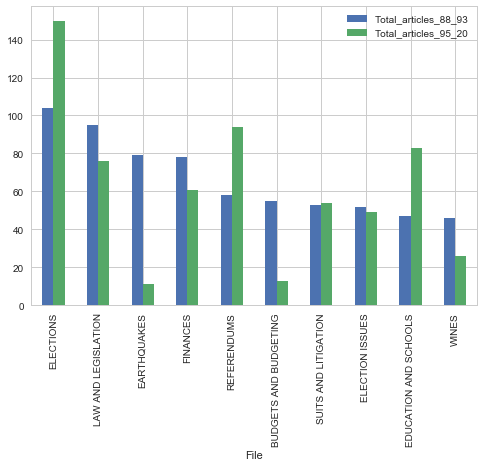

In [241]:
df_subject_dirs_merged.plot.bar()
plt.show()

##### Note: As you can see eventhough there was a large amount of discussion regarding elections, referendums where also introduced freuqently also education and schooling. Providing education to poor teenage students can ensure that they dont end up in a kill spree and there by ruining their future. 

In [242]:
#writing output to csv file
df_subject_dirs_merged.to_csv(output_folder+'article_comparison_1988_1995.csv', sep=',', encoding='utf-8')

In [ ]:
#### The analysis of articles realted to California during 1990 to 1993 shows that there was a lot of concern in the minds of American regarding human health and economic stability in California during early 90's. Further strengthening the gun laws in California after 1993 has led to trememdous decrease in death rate by guns.
#### Low-cost cigarettes and smoking behavior in California, 1990-1993.
#### Rice pesticide concentrations in the Colusa Basin Drain and the Sacramento River
#### Haemophilus influenzae Invasive Disease Among Children Aged less than 5